## Preparing DUKE CO2 data

In [2]:
# importing libraries
import xarray as xr
import glob
from datetime import datetime
import cftime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [85]:
# paths

paths = {}
paths ["ELM-DUKE"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ELM_Data/data/atm/datm7/CLM1PT_data/1x1pt_US-DUK/"
paths ["ELM-CO2"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ELM_Data/data/atm/datm7/CO2/"
paths ["FACEMDS_Walker2018"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Walker_2018_FATES_MDS/data/"
paths ["DukeFACE_Oren2022"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/"
paths ["Raleigh_Airport_Met"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/"
paths ["ERA5_Met"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ERA5_Duke_Met/"
paths ["NARR_Met"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/NARR_Met/"
paths ["AmeriFlux"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/AmeriFlux/"
paths ["Save_Processed"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_Met_Data_processed/"


## ELM DUKE CO2

In [86]:
key = "ELM-CO2"
files = glob.glob(f"{paths[key]}*DUK*control.nc")
ds_elm_co2= xr.open_mfdataset(files)


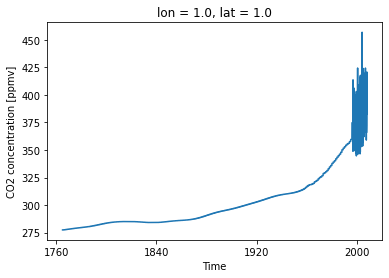

In [128]:
ds_elm_co2.CO2.plot()

In [88]:
key = "DukeFACE_Oren2022"
var_key = "CO2"
face_var_key = "CO2"

plots_cols = ['R1co2', 'R2co2', 'R3co2', 'R4co2','R5co2', 'R6co2', 'R7co2', 'R8co2']

In [89]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

In [90]:
# Create a common dataframe
# List of column names
#common_columns = ['Year', 'JDT', 'DOY', 'Time', f'{face_var_key}']
common_columns = ['Year',  'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)

In [105]:

selected_columns = plots_cols
file = files[0]
df_tmp = pd.read_csv(file)
# Calculate the mean of selected columns
df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
# only saving the common columns
df_tmp = df_tmp[common_columns]
#Appending all the common columns to the common dataframe
df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
#duplicate_data.write(f"\n")
df_tmp_common_gf = df_tmp_common_gf.reset_index(drop=True)
df_tmp_common_gf.loc[(df_tmp_common_gf['CO2']<0),'CO2'] = np.nan


<AxesSubplot:>

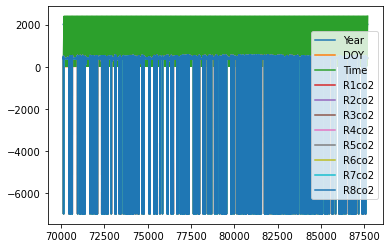

In [120]:
df = pd.read_csv(file)
df[df['Year'] >2011] 


<AxesSubplot:>

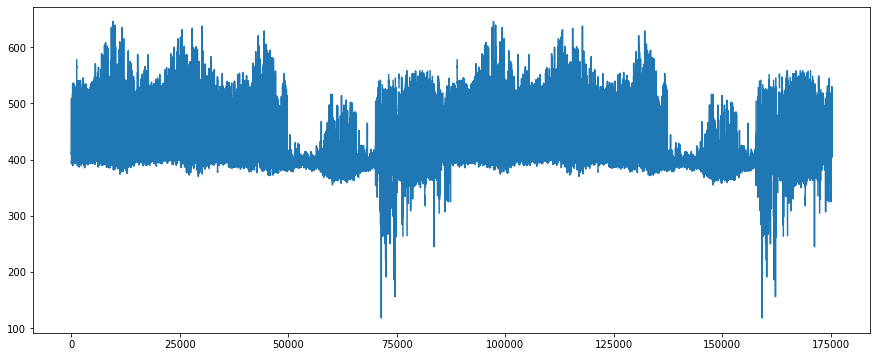

In [122]:
df_tmp_common_gf['CO2'].plot(figsize=(15,6))

In [107]:
fill_value = -6999.    
df_tmp_common_gf['CO2'] = df_tmp_common_gf['CO2'].replace(fill_value, np.nan)

# Fill NaNs with -6999.0
df_tmp_common_gf_FV = df_tmp_common_gf.fillna(fill_value)

In [108]:
df_tmp_common_gf_FV['CO2']

0         411.00
1         410.25
2         410.38
3         410.25
4         410.62
           ...  
175387    420.00
175388    419.00
175389    420.00
175390    416.00
175391    415.00
Name: CO2, Length: 175392, dtype: float64

In [109]:
# Convert 'Time' values to HH:MM format
time_str = df_tmp_common_gf['Time'].astype(str)
time_str = time_str.str.zfill(4)  # Ensure all times are 4 digits
# Making Sure time_str in has integer values only
#time_int = time_str.astype(float).astype(int)
time_int = np.asarray(np.asarray(time_str, dtype=float), dtype =int)
# Extract hours and minutes
hours = np.asarray(time_int//100, dtype = int)
minutes = np.asarray(time_int%100, dtype = int)
# Calculate the total minutes
total_minutes = hours * 60 + minutes
df_tmp_common_gf['Date'] = pd.to_timedelta(df_tmp_common_gf['DOY'] - 1, unit='D') + pd.to_timedelta(total_minutes, unit='m')
# Add Year to the Date
df_tmp_common_gf['Date'] = pd.to_datetime(df_tmp_common_gf['Year'].astype(float).astype(int).astype(str)) + df_tmp_common_gf['Date']
df_tmp_common_gf['Date'] = df_tmp_common_gf['Date']

# Add Year to the Date

df_tmp_common_gf_FV['Date'] = df_tmp_common_gf['Date']


In [110]:
sum(df_tmp_common_gf['CO2']<0)

0

In [125]:
df_h_wTime = df_tmp_common_gf.copy(deep=True)
df_h_wTime['Time'] = df_tmp_common_gf['Date']
df_h_wTime['Time'] = pd.to_datetime(df_h_wTime['Time'])
df_h_wTime = df_h_wTime.set_index('Time')
df_h_wTime = df_h_wTime.drop('Date', axis =1)

df_h_wTime['CO2']

Time
2008-01-01 00:30:00    411.00
2008-01-01 01:00:00    410.25
2008-01-01 01:30:00    410.38
2008-01-01 02:00:00    410.25
2008-01-01 02:30:00    410.62
                        ...  
2012-12-31 22:00:00    420.00
2012-12-31 22:30:00    419.00
2012-12-31 23:00:00    420.00
2012-12-31 23:30:00    416.00
2013-01-01 00:00:00    415.00
Name: CO2, Length: 175392, dtype: float64

In [127]:
df_h_wTime[df_h_wTime['CO2']<300]

,Year,DOY,CO2
Time,,,
2012-01-24 22:30:00,2012,24,284.0
2012-01-28 06:30:00,2012,28,191.0
2012-01-28 07:00:00,2012,28,118.0
2012-01-28 07:30:00,2012,28,214.0
2012-02-02 23:00:00,2012,33,277.0
...,...,...,...
2012-05-08 01:30:00,2012,129,284.0
2012-05-11 01:30:00,2012,132,264.0
2012-05-12 03:00:00,2012,133,298.0


Text(0.5, 1.0, 'Existing CO2 Control data')

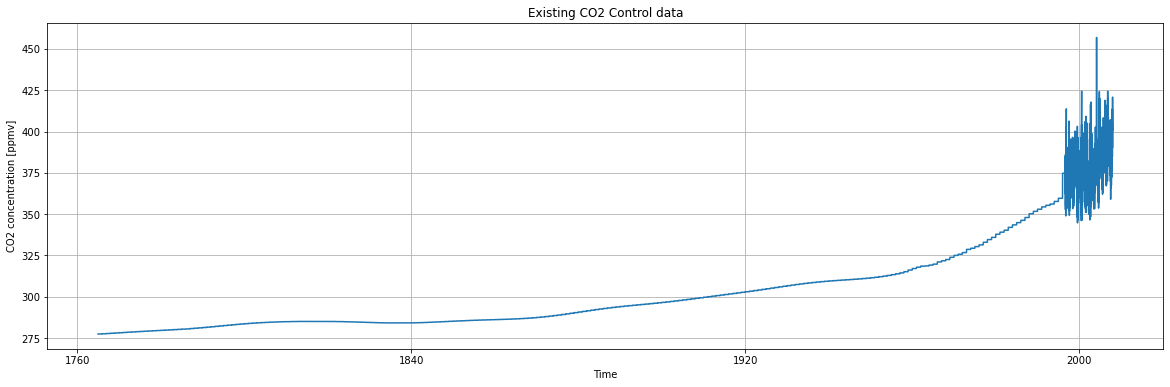

In [134]:
ds_elm_co2.CO2.plot(figsize=(20,6))
plt.grid()
plt.title("Existing CO2 Control data")

Text(0.5, 1.0, 'Existing ambient CO2 data')

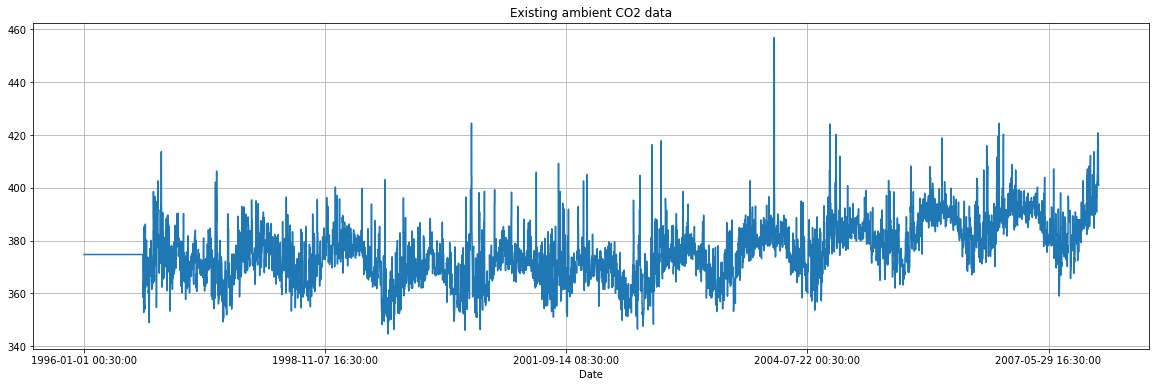

In [148]:
# Read the Processed Data
#df_all_vars_30m_FV = pd.read_csv(f"{paths['Save_Processed']}Processed_Duke_Met_Data_All_Vars_30m_FV.csv",index_col=0)
df_all_vars_30m = pd.read_csv(f"{paths['Save_Processed']}Processed_Duke_Met_Data_All_Vars_30m.csv",index_col=0)
df_all_vars_30m.set_index('Date')['aCO2'].plot(figsize=(20,6))
plt.grid()
plt.title("Existing ambient CO2 data")

Text(0.5, 1.0, 'New CO2 data')

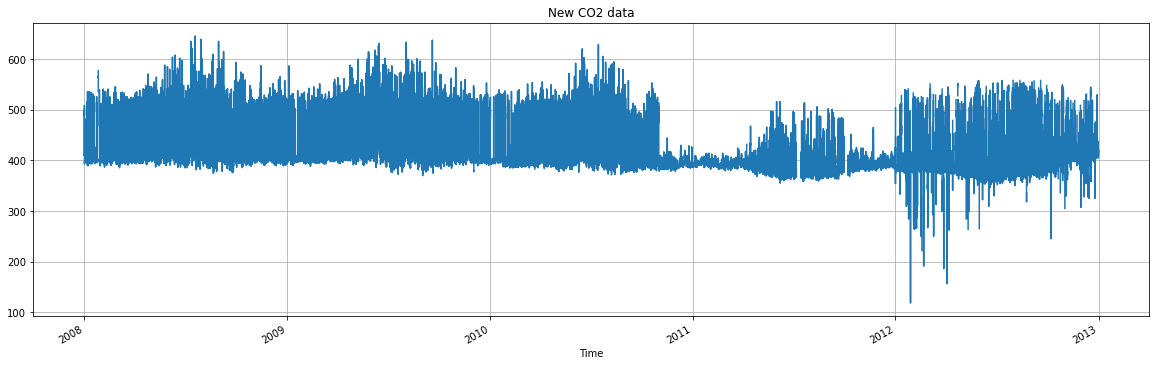

In [133]:
df_h_wTime['CO2'].plot(figsize=(20,6))
plt.grid()
plt.title("New CO2 data")

In [67]:
df_d_wTime = df_h_wTime.resample('D').mean()
df_d_wTime

,CO2
Time,
2008-01-01,437.707447
2008-01-02,399.106875
2008-01-03,402.075208
2008-01-04,407.886875
2008-01-05,207.619375
...,...
2012-12-28,418.437500
2012-12-29,-1730.145833
2012-12-30,416.062500


In [53]:
# Using the datetime index to calculate means
df_d_wTime = df_h_wTime.resample('D').mean()
df_d_wTime= df_d_wTime.drop(['DTIME','HRMIN'], axis=1)
df_d_wTime['DOY'] = round(df_d_wTime['DOY']).astype('int')

df_d_wTime

KeyError: 'DOY'

In [ ]:
# Using the datetime index to calculate means
df_d_wTime = df_h_wTime.resample('D').mean()
df_d_wTime= df_d_wTime.drop(['DTIME','HRMIN'], axis=1)
df_d_wTime['DOY'] = round(df_d_wTime['DOY']).astype('int')

# For Variables to convert from per second to per day if the original Tstep is of 30 mins
factor_multiple_s2d = 30*60

# For Rainf we need to take sum
df_d_wTime['Rainf'] = df_h_wTime[['YEAR', 'DOY', 'Rainf']].resample('D').sum()['Rainf'] * factor_multiple_s2d
# For PAR we need to take sum
df_d_wTime['PAR'] = df_h_wTime[['YEAR', 'DOY', 'PAR']].resample('D').sum()['PAR'] * factor_multiple_s2d *10**(-6)
# For Rn we need to take sum
df_d_wTime['Rn'] = df_h_wTime[['YEAR', 'DOY', 'Rn']].resample('D').sum()['Rn'] * factor_multiple_s2d *10**(-6)
# For Ndep we need to take sum
df_d_wTime['Ndep'] = df_h_wTime[['YEAR', 'DOY', 'Ndep']].resample('D').sum()['Ndep'] * factor_multiple_s2d 

# For SWdown we need to take sum
df_d_wTime['SWdown'] = df_h_wTime[['YEAR', 'DOY', 'SWdown']].resample('D').sum()['SWdown'] 

# For LWdown we need to take sum
df_d_wTime['LWdown'] = df_h_wTime[['YEAR', 'DOY', 'LWdown']].resample('D').sum()['LWdown'] 


df_d_wTime['YEAR'] =  df_d_wTime['YEAR'].astype('int')

# Reset index to columns
df_d = df_d_wTime.reset_index()
df_d = df_d.drop('Time', axis =1)

# Adding the unit row below first row
unit_row = pd.Series([dict_units_d.get(col, '') for col in df_d.columns], index=df_d.columns)
df_d_save = pd.concat([pd.DataFrame([unit_row]), df_d.iloc[:]]).reset_index(drop=True)

#Saving the dataframes
df_d_save.to_csv(f"{paths['Save_Processed']}DUKE_forcing_d.csv")
df_d_save.to_csv(f"{paths['Save_Processed']}DUKE_forcing_d.txt")

In [7]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

# Define a custom sorting key function to extract the year from the file path
def extract_year(filepath):
    return int(filepath.split(f'{var_key}')[-1][:4]) # Year

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)


ValueError: invalid literal for int() with base 10: '_200'

In [9]:
pd.read_csv(files[0])

,Year,DOY,Time,R1co2,R2co2,R3co2,R4co2,R5co2,R6co2,R7co2,R8co2
0,2008,1,30,431.0,410.0,405.0,405,410.0,410.0,407.0,410.0
1,2008,1,100,429.0,410.0,405.0,405,409.0,409.0,405.0,410.0
2,2008,1,130,426.0,411.0,406.0,405,410.0,410.0,405.0,410.0
3,2008,1,200,422.0,410.0,409.0,405,411.0,410.0,405.0,410.0
4,2008,1,230,424.0,411.0,406.0,406,410.0,411.0,405.0,412.0
...,...,...,...,...,...,...,...,...,...,...,...
87691,2012,366,2200,420.0,420.0,420.0,420,420.0,420.0,420.0,420.0
87692,2012,366,2230,419.0,419.0,419.0,419,419.0,419.0,419.0,419.0
87693,2012,366,2300,420.0,420.0,420.0,420,420.0,420.0,420.0,420.0
87694,2012,366,2330,416.0,416.0,416.0,416,416.0,416.0,416.0,416.0


In [10]:
# Create a common dataframe
# List of column names
#common_columns = ['Year', 'JDT', 'DOY', 'Time', f'{face_var_key}']
common_columns = ['Year',  'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    #duplicate_data.write(f"\n")
    df_tmp_common_gf = df_tmp_common_gf.reset_index(drop=True)
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf
First_Available_date[f"{face_var_key}"] = df_tmp_common_gf.iloc[0]
Last_Available_date [f"{face_var_key}"] = df_tmp_common_gf.iloc[-1]


NameError: name 'DuplicateDataFilename' is not defined